In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.io import imread
from skimage.morphology import square, opening, binary_opening
import os
import requests
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

Quiz 3

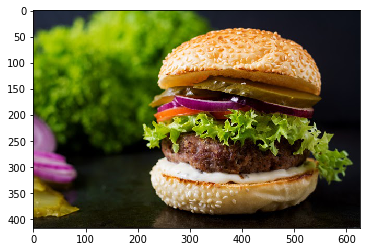

In [3]:
hamburger = imread(os.path.join("data", "hamburger.jpg")) 
plt.imshow(hamburger)
plt.show()

In [4]:
hamburger.shape

(417, 626, 3)

In [5]:
print(hamburger.size)
print(hamburger.nbytes)
print(os.stat('data/hamburger.jpg').st_size)

783126
783126
57600


In [6]:
os.stat('data/hamburger.jpg').st_size

57600

In [7]:
print("The image size in bytes:", hamburger.nbytes)

The image size in bytes: 783126


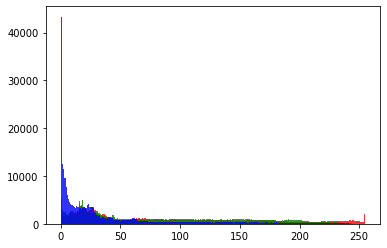

In [8]:
red = hamburger[:, :, 0]
green = hamburger[:, :, 1]
blue = hamburger[:, :, 2]

plt.hist(red.ravel(), bins = 256, color = "red", alpha = 0.8)
plt.hist(green.ravel(), bins = 256, color = "green", alpha = 0.8)
plt.hist(blue.ravel(), bins = 256, color = "blue", alpha = 0.8)

plt.show()

In [9]:
print("red:", round(red.mean(), 2))
print("green:", round(green.mean(), 2))
print("blue:", round(blue.mean(), 2))

red: 90.04
green: 84.06
blue: 37.24


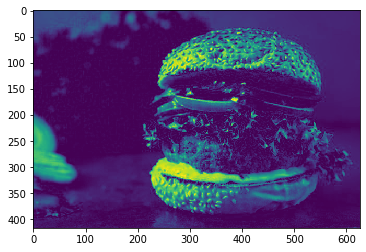

The number of white pixels in blue channel: 31


In [10]:
plt.imshow(blue)
plt.show()
print("The number of white pixels in blue channel:", np.sum(blue == 255))

Initial blue:
 [[52 52 54 ... 23 21 21]
 [52 52 54 ... 24 21 21]
 [52 52 54 ... 24 21 21]
 ...
 [18 23 27 ...  6  4  4]
 [ 9 14 20 ... 13  9  9]
 [15 18 16 ... 23 24 24]]
Blue opened with 3x3 square
 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


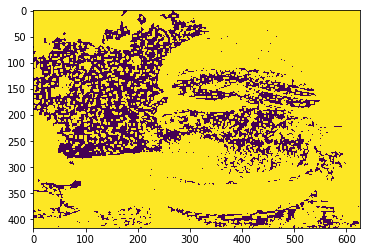

The number of the white pixels in the opened with 3x3 blue channel 202410


In [11]:
print("Initial blue:\n", blue)
opened_blue = binary_opening(blue, square(3)).astype(int) 
# all non-zero elements are considered True -> int 1!
print("Blue opened with 3x3 square\n", opened_blue)
plt.imshow(opened_blue)
plt.show()
print("The number of the white pixels in the opened with 3x3 blue channel", np.sum(opened_blue == 1))

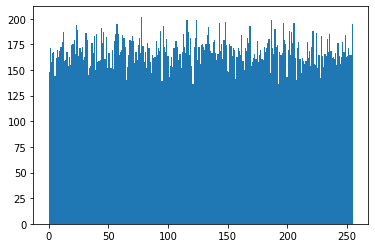

In [12]:
white_noise_url = "https://upload.wikimedia.org/wikipedia/commons/f/f6/White-noise-mv255-240x180.png"
white_noise = imread(white_noise_url) 

plt.hist(white_noise.ravel(), bins = 256)
plt.show()

In [13]:
pride_and_prejudice_url = "http://www.gutenberg.org/files/1342/1342-0.txt"
response = requests.get(pride_and_prejudice_url)
pride_and_prejudice_content = response.content.decode('utf8')
# use the correct encoding!!
#print(pride_and_prejudice_content)

In [14]:
pride_and_prejudice_words = re.split("\W+", pride_and_prejudice_content.lower())
pride_and_prejudice_words = [word.lower() for word in pride_and_prejudice_words]
word_counter = Counter(pride_and_prejudice_words)
print("Occurrences of the word 'pride':", word_counter["pride"])
print("Occurrences of the word 'prejudice':", word_counter["prejudice"])

Occurrences of the word 'pride': 53
Occurrences of the word 'prejudice': 11


In [15]:
nltk.download("stopwords")
stopwords = set(stopwords.words("english"))
words_without_stopwords = [w for w in pride_and_prejudice_words if w not in stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
word_counter_without_stopwords = Counter(words_without_stopwords)
word_counter_without_stopwords.most_common(10)

[('mr', 785),
 ('elizabeth', 635),
 ('could', 526),
 ('would', 468),
 ('darcy', 417),
 ('said', 401),
 ('mrs', 343),
 ('much', 327),
 ('bennet', 323),
 ('must', 315)]

The name of the protagonist (main character) in the book is Elizabeth.